#Zadania klasyfikacji - perceptron, regresja logistyczna


Proszę nie używać dostępnych w bibliotekach klasyfikatorów.


## plot_decision_regions

In [1]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

        # konfiguruje generator znaczników i mapę kolorów
        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
        cmap = ListedColormap(colors[:len(np.unique(y))])

        # rysuje wykres powierzchni decyzyjnej
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

        # rysuje wykres wszystkich próbek
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


##1. Używając perceptronów napisz klasyfikator wielo-klasowy (klasyfikujący 3 lub więcej klas). Dla każdej z klas użyj klasyfikatora binarnego. Przykład klasyfikatora binarnego znajduje się poniżej.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets

class Perceptron(object):

    # Konstruktor, podajemy współczynik uczenia sie oraz ilość epok
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1+ X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update *xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

class Classifier:
    def __init__(self, ppn, ppn1):
        self.ppn = ppn
        self.ppn1 = ppn1

    def predict(self, x):
        y = np.where(self.ppn1.predict(x) == 1, 2, 1)
        return np.where(self.ppn.predict(x) == 1, 0, y)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


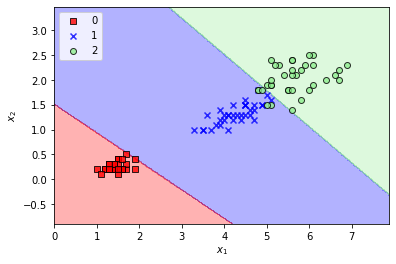

In [8]:
def main():
    # pobiera danne do uczenia i testowania
    iris = datasets.load_iris()
    X = iris.data[:, [2, 3]]
    y = iris.target
    # podział danych na testowe i treningowe
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

    # selekcja danych z klas 0 i 1
    X_train_01_subset = X_train.copy()
    y_train_01_subset = y_train.copy()
    y_train_02_subset = y_train.copy()
    # w perceptronie wyjście jest albo 1 albo -1    
    y_train_01_subset[(y_train == 0)] = 1
    y_train_01_subset[(y_train == 1) | (y_train == 2)] = -1
    y_train_02_subset[(y_train == 2)] = 1
    y_train_02_subset[(y_train == 0) | (y_train == 1)] = -1
    ppn = Perceptron(eta=0.1, n_iter=200)
    ppn1 = Perceptron(eta=0.1, n_iter=200)
    # uczenie modelu
    ppn.fit(X_train_01_subset, y_train_01_subset)
    ppn1.fit(X_train_01_subset, y_train_02_subset)
    classi = Classifier(ppn, ppn1)


    # wyświetla wykres
    plot_decision_regions(X_train, y_train, classifier=classi)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper left')
    plt.show()
    

if __name__ == '__main__':
    main()

##2. Napisz klasyfikator wielo-klasowy przy użyciu regresji logistycznej. Dla każdej z klas użyj klasyfikatora binarnego. Przykład regresji logistycznej dla przypadku dwuklasowego znajduje się poniżej.

In [4]:
import numpy as np
import matplotlib.pylab as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split




class LogisticRegressionGD(object):
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

class Classifier:
    def __init__(self, lrgd, lrgd1):
        self.lrgd = lrgd
        self.lrgd1 = lrgd1

    def predict(self, x):
        y = np.where(self.lrgd1.predict(x) == 1, 2, 1)
        return np.where(self.lrgd.predict(x) == 1, 0, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row

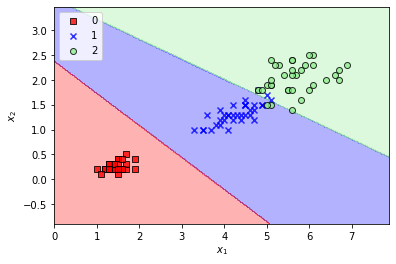

In [5]:
def main():
    iris = datasets.load_iris()
    X = iris.data[:, [2, 3]]
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

    #w regresji logarytmicznej wyjście przyjmuje wartości 0 lub 1 (prawdopodobieństwa)
    X_train_01_subset = X_train.copy()
    y_train_01_subset = y_train.copy()
    y_train_02_subset = y_train.copy()

    y_train_01_subset[(y_train == 0)] = 1
    y_train_01_subset[(y_train == 1) | (y_train == 2)] = 0
    y_train_02_subset[(y_train == 2)] = 1
    y_train_02_subset[(y_train == 0) | (y_train == 1)] = 0

    lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
    lrgd.fit(X_train_01_subset, y_train_01_subset)

    lrgd1 = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
    lrgd1.fit(X_train_01_subset, y_train_02_subset)

    classi = Classifier(lrgd, lrgd1)

    plot_decision_regions(X_train, y_train, classifier=classi)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper left')
    plt.show()


if __name__ == '__main__':
    main()

##3. Dla regresji logistycznej napisz metodę wypisującą prawdopodobieństwo przynależności próbki (próbek) do danej klasy (klas).

In [21]:
from sklearn import metrics
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import matplotlib.pylab as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

class LogisticRegressionGD(object):
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

class Classifier:
    def __init__(self, lrgd, lrgd1):
        self.lrgd = lrgd
        self.lrgd1 = lrgd1

    def predict(self, x):
        y = np.where(self.lrgd1.predict(x) == 1, 2, 1)
        return np.where(self.lrgd.predict(x) == 1, 0, y)

def propability(X_train, lrgd):
  for x_train in X_train:
    res = lrgd.activation(lrgd.net_input(x_train))
    res = round(res, 4) * 100
    print(res)
  print(' ')



def main():
    iris = datasets.load_iris()
    X = iris.data[:, [2, 3]]
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

    #w regresji logarytmicznej wyjście przyjmuje wartości 0 lub 1 (prawdopodobieństwa)
    X_train_01_subset = X_train.copy()
    y_train_01_subset = y_train.copy()
    y_train_02_subset = y_train.copy()

    y_train_01_subset[(y_train == 0)] = 1
    y_train_01_subset[(y_train == 1) | (y_train == 2)] = 0
    y_train_02_subset[(y_train == 2)] = 1
    y_train_02_subset[(y_train == 0) | (y_train == 1)] = 0

    lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
    lrgd.fit(X_train_01_subset, y_train_01_subset)

    lrgd1 = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
    lrgd1.fit(X_train_01_subset, y_train_02_subset)


    propability(X_train_01_subset, lrgd)
    propability(X_train_01_subset, lrgd1)

if __name__ == '__main__':
    main()

99.9
99.72
0.0
0.0
99.95
0.0
0.0
99.95
0.0
0.0
1.63
0.02
99.92999999999999
0.0
0.03
0.0
99.44
0.8099999999999999
0.06999999999999999
99.8
0.0
0.0
0.0
0.0
0.16999999999999998
0.0
0.0
0.0
0.0
0.0
0.02
99.59
0.0
0.0
0.0
0.0
0.0
0.0
0.0
99.8
0.0
99.9
0.0
98.36
99.98
0.0
99.86
99.98
0.0
0.0
99.52
0.8099999999999999
0.1
99.86
99.86
99.86
0.41000000000000003
0.0
99.88
0.0
99.92999999999999
0.0
0.0
99.8
99.9
0.01
0.0
0.11
0.02
0.0
0.0
0.0
0.0
0.0
0.0
0.0
99.59
98.6
0.0
0.0
0.0
0.0
99.86
0.01
0.0
0.0
99.76
99.9
0.0
99.83
0.0
0.12
0.02
0.01
99.92
0.0
0.01
99.92999999999999
99.83
0.0
99.88
0.05
99.42
99.86
99.92999999999999
 
0.0
0.0
100.0
100.0
0.0
100.0
100.0
0.0
99.75
0.01
0.0
0.0
0.0
0.0
0.0
99.83
0.0
0.0
0.0
0.0
88.21
100.0
0.19
0.0
0.0
100.0
0.13
62.27
100.0
100.0
0.0
0.0
100.0
99.62
88.21
100.0
0.02
100.0
99.95
0.0
94.28999999999999
0.0
18.310000000000002
0.0
0.0
4.3999999999999995
0.0
0.0
99.95
0.9400000000000001
0.0
0.0
0.0
0.0
0.0
0.0
0.0
100.0
0.0
4.3999999999999995
0.0
1.3599999999999

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


# Program